<a href="https://colab.research.google.com/github/Aayushi4925/Telecom_churn/blob/main/Copy_of_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# Lets Know What is churn Analysis and why churn Analysis is important: 
Churn analytics is the process of measuring the rate at which customers quit the product, site, or service. It answers the questions “Are we losing customers?” and “If so, how?” to allow teams to take action. Lower churn rates lead to happier customers, larger margins, and higher profits.

In [25]:
from google.colab import drive  #mounting the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [3]:
path = '/content/drive/MyDrive/Telecom Churn.csv'   #giving path for csv file
df = pd.read_csv(path)

In [ ]:
df.shape   #number of rows and columns in dataset

(3333, 20)

In [ ]:
pd.set_option('display.max_columns',None)  #displaying all the columns of dataset
df.head()  #first five rows

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
pd.set_option('display.max_columns',None)
df.tail()  #last five rows of dataset

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
df.isnull().sum()   #checking null values in the dataset

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

No any null values are present in the dataset 

In [ ]:
df.info()   #info returns datatype and non null counts in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Dataset consists of 20 columns and 3333 rows 
Datatype of all the columns are correct except churn(dependent variable)
Changing datatype of churn to string (for EDA) will be treating churn as categorical column

In [31]:
df_copy = df.copy()  #creating copy of the original dataset for any changes 
df_copy['Churn'] = df_copy['Churn'].astype(str)  #changing the datatype of churn from bool to string

In [32]:
numerical_features = [i for i in df if df_copy[i].dtypes!='O']    #segregating numerial features from the dataset
numerical_features

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [19]:
categorical_columns = [col for col in df_copy if df_copy[col].dtypes=='O']   #categorical features of the dataset
categorical_columns

['State', 'International plan', 'Voice mail plan', 'Churn']

# **Univariate** **Analysis**

Account length


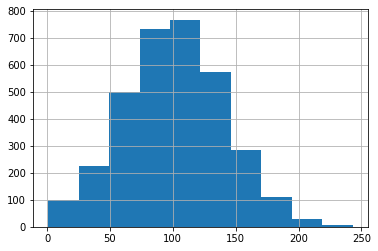

Area code


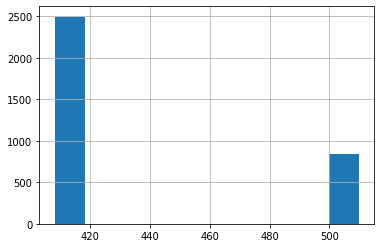

Number vmail messages


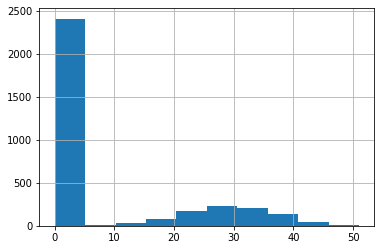

Total day minutes


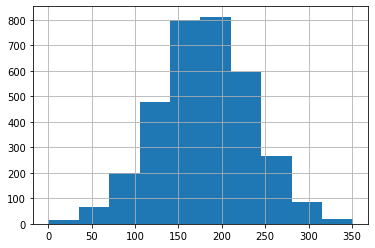

Total day calls


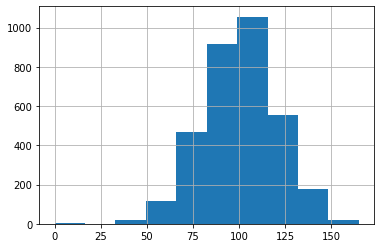

Total day charge


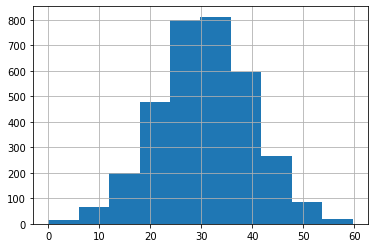

Total eve minutes


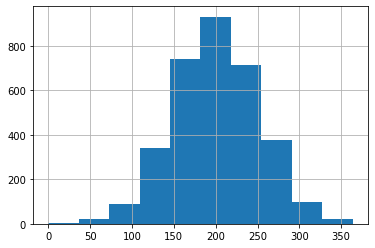

Total eve calls


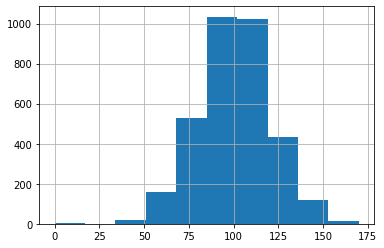

Total eve charge


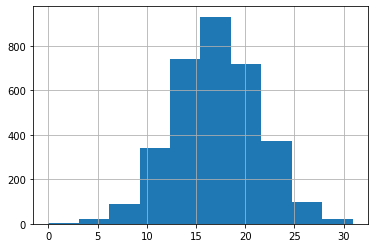

Total night minutes


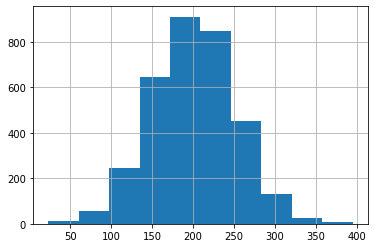

Total night calls


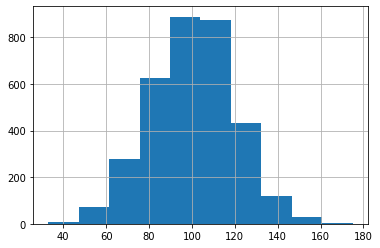

Total night charge


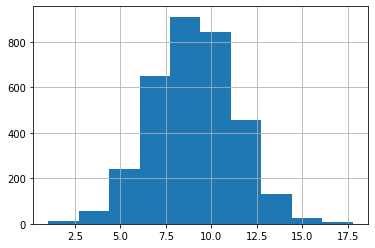

Total intl minutes


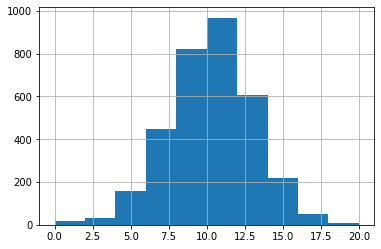

Total intl calls


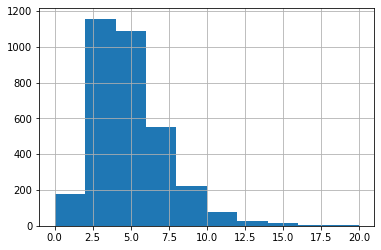

Total intl charge


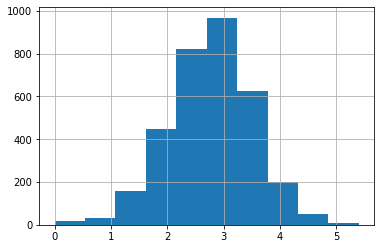

Customer service calls


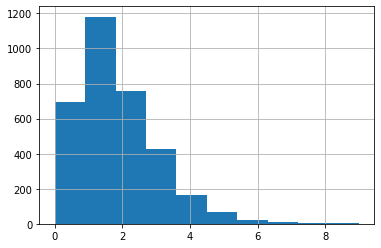

In [ ]:
for i in numerical_features:
    print(i)
    df[i].hist(bins=10)        #creating histogram for all the numerical  features to know the distribution and behaviour of the columns
    plt.show()

# Observations of numerical columns analysis:

1.Area Code and Number of voicemail messages seems populated in certain range
2. Total international calls and customer service calls are slightly right skewed
3. Rest of the columns are close to normal distribution

Looking at the value counts of Area code and Number vmail messages 

In [ ]:
print(df_copy['Area code'].value_counts())  

415    1655
510     840
408     838
Name: Area code, dtype: int64


In [ ]:
print(df_copy['Number vmail messages'].value_counts())

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: Number vmail messages, dtype: int64


Area code and Number of voice messages are acccumulated at certain values because in area code only three different values are there and in voice messages 80%(approx.) observations are 0

Customers belongs from three areas only

In [ ]:
df.describe()  #using describe function to get the statistcal behaviour of dataset

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Statistical Analysis:

1. Count of all the columns are 3333 as there is no null values in dataset
2. customer service calls and international calls are giving low std which indicates the data points tend to be close to the mean and least data despersion
3.As noted in univariate numerical analysis mean and median(50%) are almost equal except number of vmail messages and area code which indicates normal distribuiton in rest of the columns
4. Total day calls , Total eve calls minimum values are zero but Total night calls minimum value is 33
5. Maximum values of night calls and night calls minutes is greater than day calls minutes and eve calls minutes
6.Concluding from point 4 and 5 customers are most likely calling at night compare to day and eve.
7.Area code , number of vmail messages , international calls , customer services are slightly skewed columns

In [ ]:
for i in categorical_columns:    # checking the counts of observations in each category and in dependent feature(Churn)
    print(i)
    print(df_copy[i].value_counts())
    print('.........................')

State
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64
.........................
International plan
No     3010
Yes     323
Name: International plan, dtype: int64
.........................
Voice mail plan
No     2411
Yes     922
Name: Voice mail plan, dtype: int64
.........................
Churn
False    2850
True      483
Name: Churn, dtype: int64
.........................


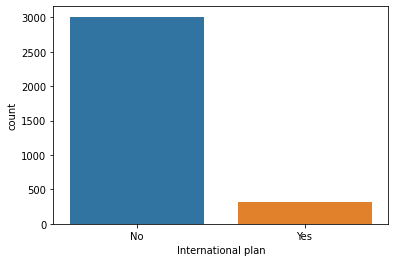

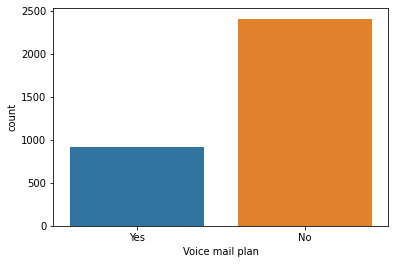

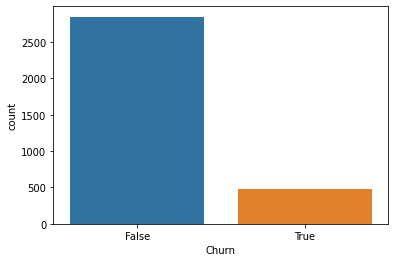

In [ ]:
for i in categorical_columns:
    if(i=='State'):   #not taking state for countplot as all the values has almost equal number of observations
      pass
    else:
      sns.countplot(df_copy[i])
      plt.show()

Categorical columns are imbalanced 

Majority of the customers are not using international plans and voice mail plans

91%(approx.) customers did not stop using the service


# **Bivariate** **Analysis**

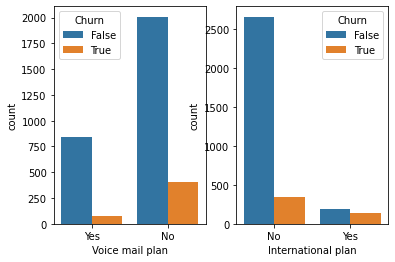

In [11]:
plt.subplot(1,2,1)
sns.countplot(df['Voice mail plan'],hue='Churn',data=df)   #subplots to compare the customer churn on the basis of international and voice mail plan
plt.subplot(1,2,2)
sns.countplot(df['International plan'],hue='Churn',data=df)  

Though voice mail plan and international plan are imbalanced columns but it is clear from the plots that customers who are using international plans are stop using the service

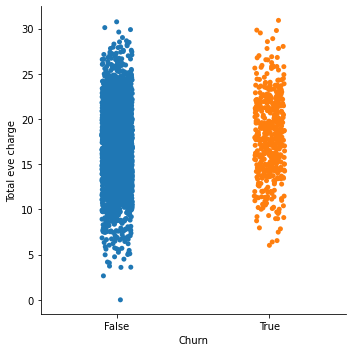

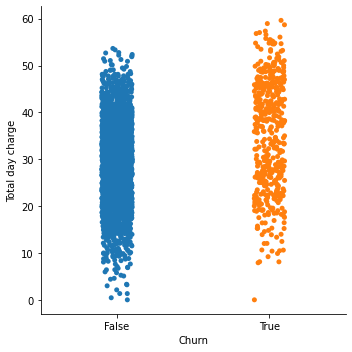

In [14]:
sns.catplot(x='Churn',y='Total eve charge',data=df_copy)
sns.catplot(x='Churn',y='Total day charge',data=df_copy)


Customers with day charges are stopped using the service compare to customers paying eve charges

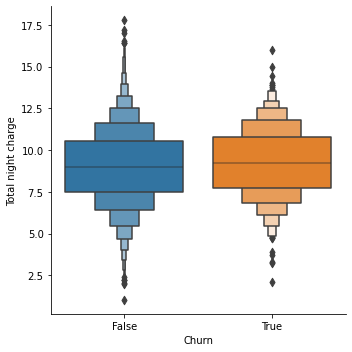

In [15]:
sns.catplot(x='Churn',y='Total night charge',kind='boxen',data=df_copy)

Median of night charges is almost equal in both the cases of true and false of churn (night charges are not affecting the churn of the customers abruptly)

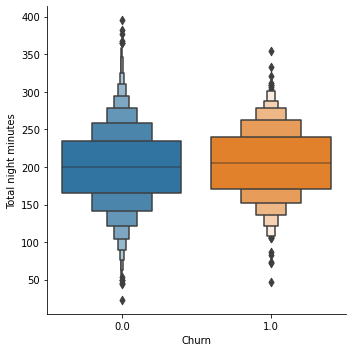

In [27]:
sns.catplot(x='Churn',y='Total night minutes',kind='boxen',data=df_copy)


# **Multivariate Analysis**

In [17]:
from sklearn.preprocessing import OrdinalEncoder   #importing ordinalencode library to encode categorical columns
ord_en = OrdinalEncoder()  #creating object of ordinalencoder

In [20]:
for i in categorical_columns:
    df_copy[i] = ord_en.fit_transform(df_copy[i].values.reshape(-1,1))    #performing ordinal encoding to each categorical columns 

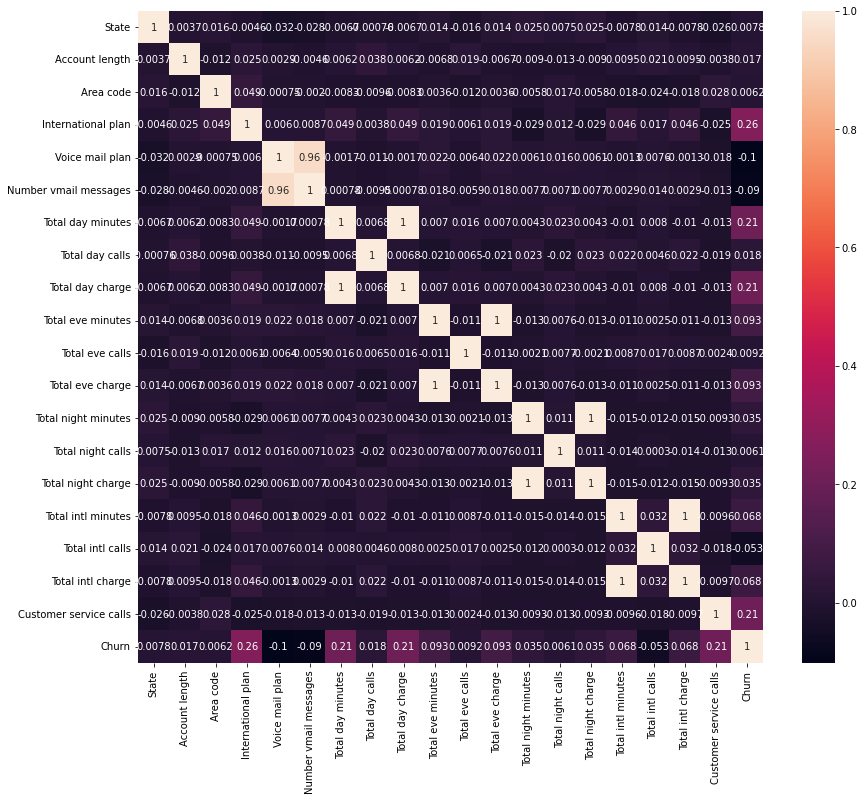

In [26]:
plt.figure(figsize=(14,12))
sns.heatmap(df_copy.corr(),annot=True)   #creating heatmap of dataset through correlation 

considering thershold of 0.5 :

International plan  and customer service calls is positively correlated to churn (customers using international plan and getting more customer service calls are stopped using the services)

80%(approx.) are not using voice mail plan though after taking the plan

Voice plan and number of voice messages are negatively correlated with
churn 






# **Checking Outliers and skewness in numerical features**

In [33]:
for i in numerical_features:
    print(i)
    print(df[i].skew())   #checking skewness of each numerical column
    

Account length
0.09660629423135147
Area code
1.126822908805058
Number vmail messages
1.2648236337102594
Total day minutes
-0.029077067143188955
Total day calls
-0.11178663903979906
Total day charge
-0.029083268343274994
Total eve minutes
-0.023877456078123447
Total eve calls
-0.05556313904148763
Total eve charge
-0.02385798900760956
Total night minutes
0.008921291065494056
Total night calls
0.03249957015209059
Total night charge
0.008886236769217034
Total intl minutes
-0.2451359394861856
Total intl calls
1.3214781658271222
Total intl charge
-0.24528650827172838
Customer service calls
1.0913594824728512


As we observed in univariate analysis Number of vmail messages , Total international calls, area code and customer service calls  right skewed
In area code and number of vmail messages we already know reason for the skewness
But in International calls and Customer service calls outliers could be reason of the skewness lets check for the outliers in both the columns   

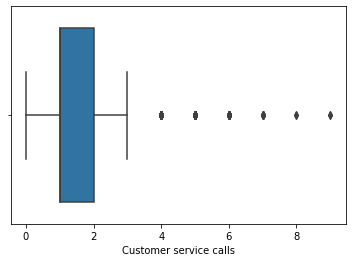

In [34]:
sns.boxplot(df['Customer service calls'])  #checking outliers in customer cervice calls
plt.show()

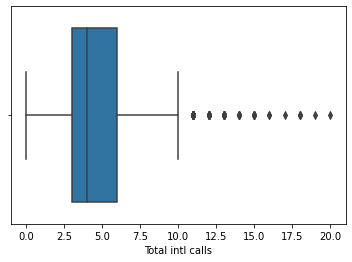

In [35]:
sns.boxplot(df['Total intl calls']) #find outliers in international calls
plt.show()

Outliers are there in both the columns which need to be fix before model building with square root transformation or Iqr but as of now I not treating it in EDA

# **Conclusion:**

91%(approx.) customers are continuing the service 

Though after analysing the overall behaviour of the customers:
Customers most likely not happy with the international call services
Customers opt voice mail plans are not using that often 
Company has customers from onyl three area (three area code are found)
Most likely calls and number of minutes customers are talking are at night compare to days and evening
Customers recieving are not entertaining service calls 
Customers don't want to pay more day calls charges (as they are not using that often)

Future Plans:
Improvement in international plans 
Pitching to use voice mail plans 
Look for customers in more and different areas 
Changes in the day calls and its charges accordingly  

